In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
grid_Size = 4
dmin, dmax = 0, 1
cords = []

In [3]:
for i in range(grid_Size):
    for j in range(grid_Size):
        x = (2 * i + 1) / 8
        y = (2 * j + 1) / 8
        cords.append((x, y))

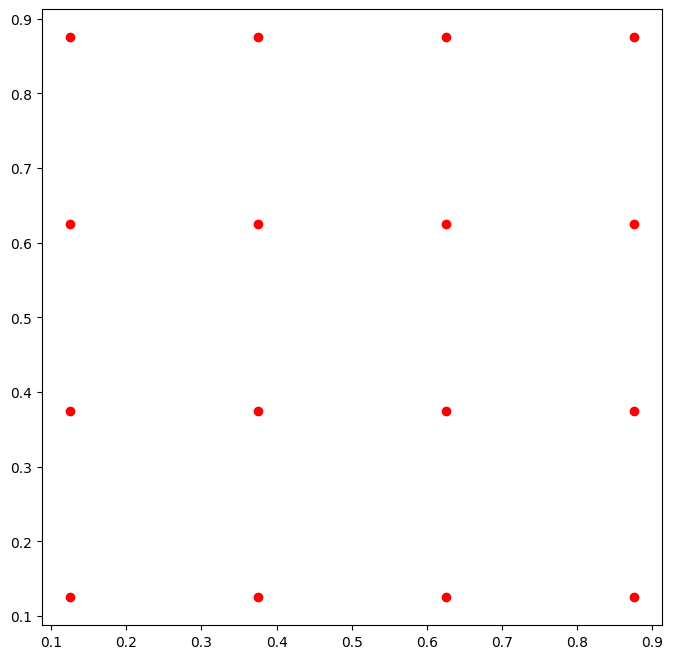

In [5]:
plt.figure(figsize=(8, 8))

for (x, y) in cords:
    plt.plot(x, y, 'ro')

plt.show()

In [15]:
n_points = 5
sampling_radius = 0.05

points = []
labels = []
cluster = 0
for (cx, cy) in cords:
    if cluster:
        label = 1
    else:
        label = -1
    for _ in range(random.randint(1, 10)):
        angle = np.random.uniform(0, 2 * np.pi)
        radius = np.random.uniform(0, sampling_radius)
        x = cx + radius * np.cos(angle)
        y = cy + radius * np.sin(angle)
        # Ensure points stay within the domain boundaries
        x = np.clip(x, dmin, dmax)
        y = np.clip(y, dmin, dmax)
        points.append((x, y))
        labels.append(label)
    
    if cluster:
        cluster = 0
    else:
        cluster = 1

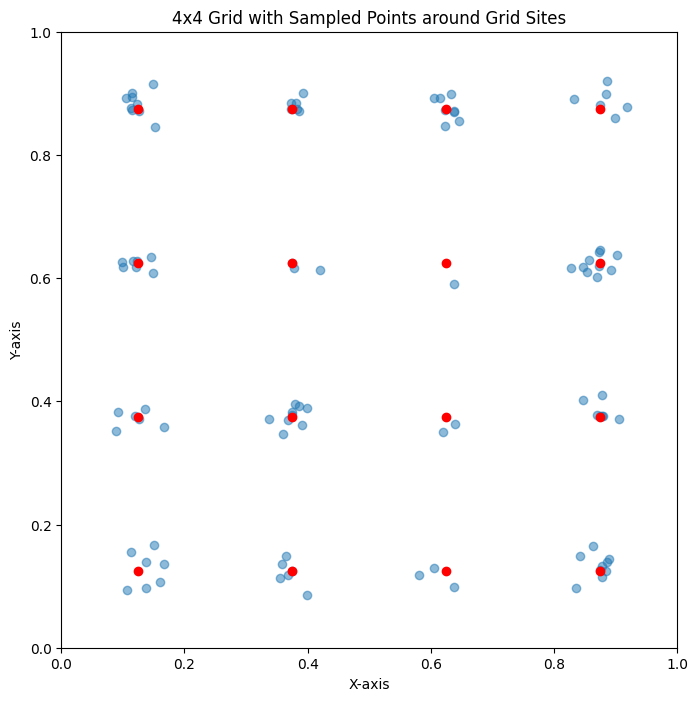

In [16]:
plt.figure(figsize=(8, 8))

# Plot the grid centroids
for (x, y) in cords:
    plt.plot(x, y, 'ro')

# Plot sampled points
sampled_points = np.array(points)
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], alpha=0.5)

plt.xlim(dmin, dmax)
plt.ylim(dmin, dmax)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('4x4 Grid with Sampled Points around Grid Sites')
plt.show()

In [17]:
labels

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1]

In [24]:
df = pd.DataFrame(points, columns=['feature 1', 'feature 2'])
df['target'] = labels

In [25]:
df

,feature 1,feature 2,target
0,0.138163,0.139808,-1
1,0.159587,0.107494,-1
2,0.166070,0.135982,-1
3,0.136783,0.097498,-1
4,0.113922,0.156125,-1
...,...,...,...
94,0.898811,0.859308,1
95,0.884012,0.898239,1
96,0.885284,0.920441,1
97,0.831674,0.890252,1


In [27]:
df.to_csv('data/checherboard_paper.csv', index=False)